# CertiK – Web Scraping Technical Evaluation

In this notebook, I will cover design decisions, exploratory data analysis , and potential improvements.

## General Acknowledgements


#### Low security environment
I acknowledge that there is a severe lack of security during this process. I felt that given the time constraints and nature of this assignment, it was best to focus on the main task at hand which is showcasing various web scraping methodologies.

#### Opportunities for improvement

If I allot more time to this challenge, some other technologies I would considering using are:
* Streamlit: a platform to quickly build data MVPs
* Heroku: another cloud computing service
* FPDF (a python library): generate a beautiful PDF report of my results using the FPDF library in Python
* I would store data in AWS S3, using the boto3 module, just to demonstrate that I capable of using S3

***Check out my data driven Rent Estimator app: https://jastinder.herokuapp.com/***

## Exercise 1A: Scraping Autograph.io (Tom Brady's NFT Marketplace)

Autograph.io is "an NFT platform that brings together the most iconic brands and legendary names in sports, entertainment and culture to create unique digital collections and experiences." 
 
#### Motivation: 

I chose this website because Autograph.io is Tom Brady's NFT Venture, and I would consider myself a fan of Tom Brady. I assume that this sort of site will not have sophistacated anti-scraping measures in place, which will ultimately increase will likelihood of success.

#### Objective: 

Monitor the leaderboards for top collectors and over time, track each individuals score and streak (who's on top, how long have they been there and by how much have they been in the lead, etc).

#### Data Integrity
Granted that this is a newer, novel business venture, and generally unregulated I am a little bit skeptical to trust the data. I am directly scraping data provided by Autograph.io, I am assuming that Autograph.io's leaderboard data is valid and true, and is not being artificially inflated or misrepresenting in any matter. I have no way of truly validating this myself so I must simply make the assumption that what is displayed is true!


Always keep GIGO (garbage in, garbage out) in mind!

Status Code: 200
   Rank Collector_Username Collector_Score
0     1   @laukialovforeve         1392832
1     2         @takrummel         1282759
2     3           @mkatzpp         1177140
3     4             @italy         1126669
4     5            @dkjets         1078025
5     6      @stingray1004          879005
6     7          @ahiles16          830368
7     8    @samiratinitech          773520
8     9         @bheals152          739157
9    10          @spagatti          722068
10   11         @autocraft          718303
11   12         @greatnape          623309
12   13            @lowal7          618057
13   14      @cheddarmills          589866
14   15         @jmzentner          576774
15   16            @ncane1          543013
16   17        @mikeyt2177          534380
17   18    @bladevisionary          530010
18   19       @wmrickjames          480163
19   20      @datrashman13          448519
20   21     @swaggycripple          434929
21   22       @stevens1979          4

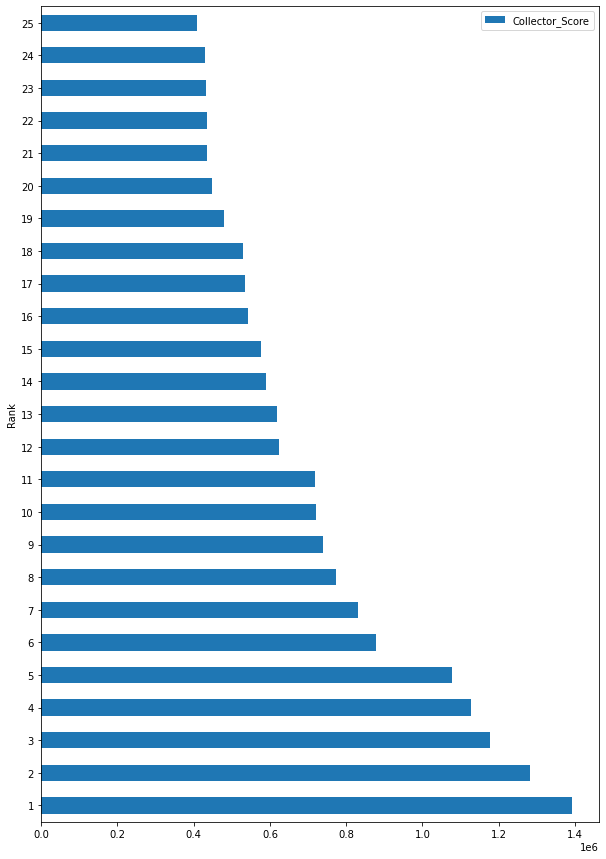

In [1]:
# Let's demonstrate how to collect Autograph.io's NFT leaderboard data by simply scraping it

# I have successfully used the bs4 module in the past to parse scraped data so I am naturally inclined to use it again
import requests
from bs4 import BeautifulSoup

# After inspecting the webpage externally, I determined that the below URL was the right one to scrape for our objective
url="https://autograph.io/leaderboards"

# Make a GET request to fetch the raw HTML content
raw_data = requests.get(url)
print('Status Code:', raw_data.status_code) # verify that the request was successful

# Download and save the raw data locally
import time
timestamp = time.strftime('%Y%m%d')
filename = f'{timestamp}_Autograph_Leaderboard'
with open(f'Data Dump/{filename}.html', 'w') as f:
    f.write(raw_data.text)
    
# Parse the raw HTML data using BeautifulSoup
with open(f'Data Dump/{filename}.html', 'r') as f:
    soup = BeautifulSoup(f, "html.parser")
    
#print(soup.prettify)

# After further inspecting the webpage externally, I found the following tags were the right ones to parse in order to meet our objective
users = soup.find('div', class_="leaderboards-grid__wrap").find_all('div', class_="user-card w-profile-img card-visibility")

# We can use the pandas library to structure the data nicely
import pandas as pd
import re

leaderboard = pd.DataFrame(columns=['Rank','Collector_Username','Collector_Score'])

for user in users:
    rank = user.find('span').text
    # print(rank)
    name = user.find('div', class_="user-card__user-info").text
    # print(name)
    score = user.find('div', class_="user-card__score").text
    score = re.sub('[^0-9]','',score)
    # print(score)
    leaderboard = leaderboard.append({'Rank':int(rank),'Collector_Username':name,'Collector_Score':int(score)},ignore_index=True)

#Save our pandas dataframe as a CSV, per the requirements
leaderboard.to_csv(f'Data Dump/{filename}.csv')
print(leaderboard.to_string())
print(leaderboard.plot.barh(x='Rank',y='Collector_Score',figsize=(10,15)))

### Future improvements

- This chunk of code can be written in a .py file and be automatically run daily, using the "schedule" library ran in the background.
- Pagination. I only scraped the first page, however more code can be written to allow us to scrape subsequent pages.